<a href="https://colab.research.google.com/github/TangNgheQuangHuy/TangNgheQuangHuy-20146255/blob/main/Vehicle_classification_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

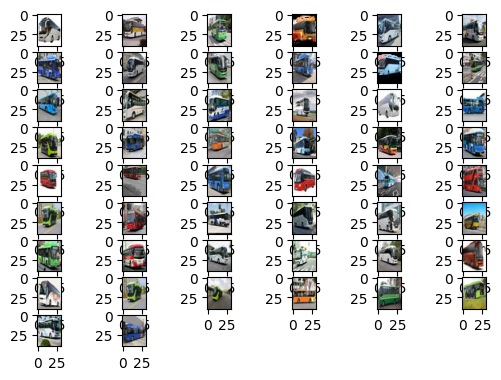

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Vehicle/'

for i in range(50):
  plt.subplot(10,6,i+1)
  picture = folder + 'bus ('+ str(i+1)+').jpg'
  image = plt.imread(picture)
  plt.imshow(image)
plt.show()

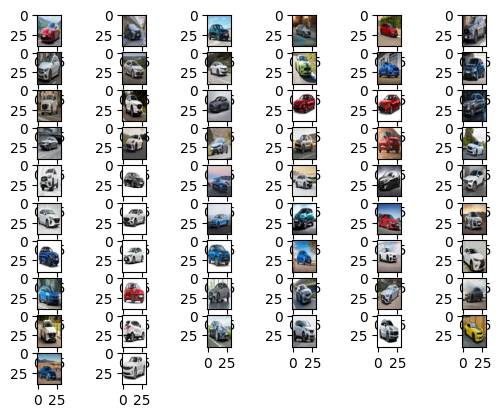

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Vehicle/'

for i in range(56):
  plt.subplot(10,6,i+1)
  picture = folder + 'Car ('+ str(i+1)+').jpg'
  image = plt.imread(picture)
  plt.imshow(image)
plt.show()

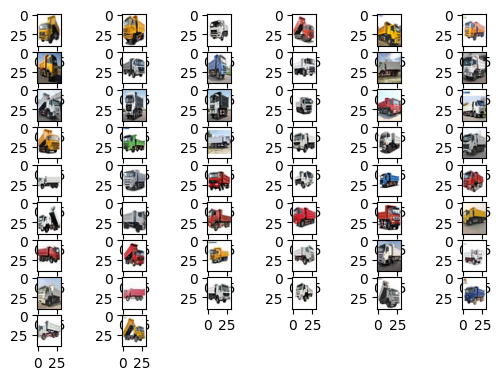

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Vehicle/'

for i in range(50):
  plt.subplot(10,6,i+1)
  picture = folder + 'Truck ('+ str(i+1)+').jpg'
  image = plt.imread(picture)
  plt.imshow(image)
plt.show()

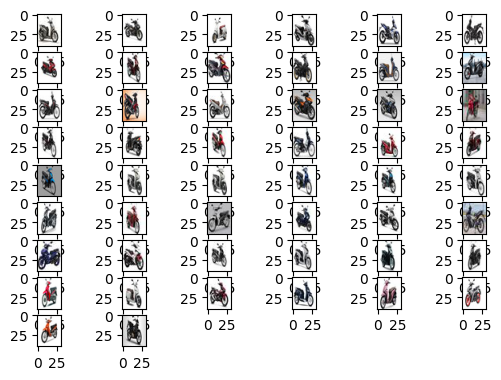

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Vehicle/'

for i in range(50):
  plt.subplot(10,6,i+1)
  picture = folder + 'motorbike ('+ str(i+1)+').jpg'
  image = plt.imread(picture)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir 
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/Vehicle/'
photos,labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('bus'):
    output = 1 
  if file.startswith('Car'):
    output = 2
  if file.startswith('Truck'):
    output = 3
  if file.startswith('motorbike'):
    output = 4
  img = load_img(folder + file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/vehicles_photos.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/vehicles_labels.npy',labels)

(206, 30, 40, 3) (206,)


In [ ]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/vehicles_photos.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/vehicles_labels.npy')
print(x_train.shape)
print(y_train.shape)
x_train = x_train.astype('float32')/255

(206, 30, 40, 3)
(206,)


In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

y_train = to_categorical(y_train,10)
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,40,3),padding='same'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train, batch_size=64,epochs=50,verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 15, 20, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

1/1 [==============================] - 0s 192ms/step


'bus'

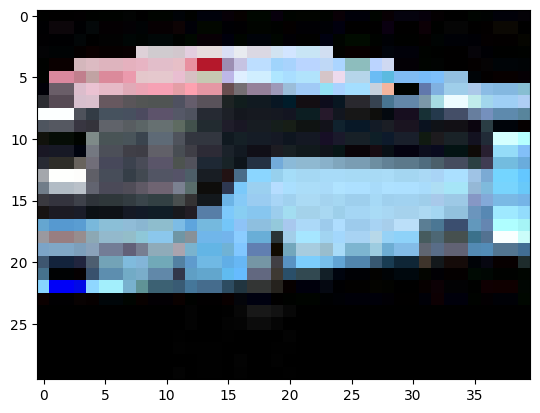

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
name = {1:'bus',2:'Car', 
       3:'Truck', 4:'motorbike'} 
img = load_img("/content/drive/MyDrive/Vehicle/bus (11).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
name[result[0]]

1/1 [==============================] - 0s 40ms/step


'bus'

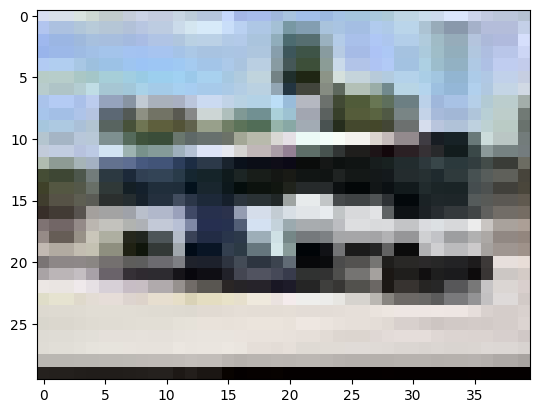

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
name = {1:'bus',2:'Car', 
       3:'Truck', 4:'motorbike'} 
img = load_img("/content/drive/MyDrive/Vehicle/bus (33).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
name[result[0]]

1/1 [==============================] - 0s 19ms/step


'Car'

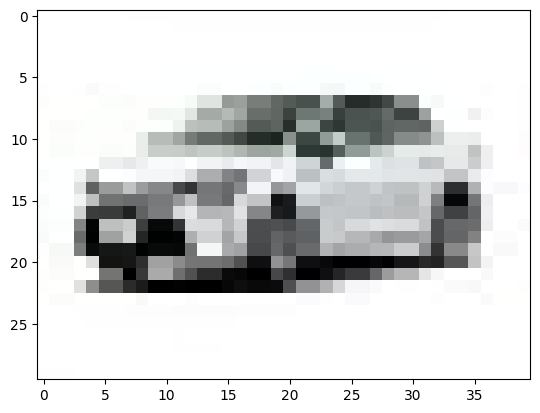

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
name = {1:'bus',2:'Car', 
       3:'Truck', 4:'motorbike'} 
img = load_img("/content/drive/MyDrive/Vehicle/Car (38).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
name[result[0]]

1/1 [==============================] - 0s 23ms/step


'Truck'

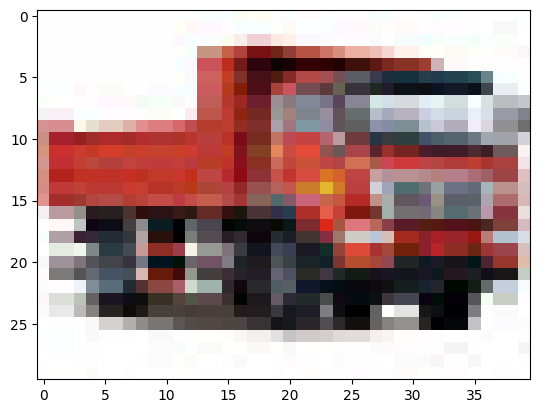

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
name = {1:'bus',2:'Car', 
       3:'Truck', 4:'motorbike'} 
img = load_img("/content/drive/MyDrive/Vehicle/Truck (35).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
name[result[0]]

In [ ]:
from tensorflow.keras.models import load_model
model.save('Finalproject.h5')
model_CNN = load_model('Finalproject.h5')